___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Choropleth Maps Exercise 

Welcome to the Choropleth Maps Exercise! In this exercise we will give you some simple datasets and ask you to create Choropleth Maps from them. Due to the Nature of Plotly we can't show you examples

[Full Documentation Reference](https://plot.ly/python/reference/#choropleth)

## Plotly Imports

In [1]:
import plotly.graph_objs as go 
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

** Import pandas and read the csv file: 2014_World_Power_Consumption**

In [12]:
df = pd.read_csv('2014_World_Power_Consumption')

In [13]:
df.head()

,Country,Power Consumption KWH,Text
0,China,5.523000e+12,"China 5,523,000,000,000"
1,United States,3.832000e+12,"United 3,832,000,000,000"
2,European,2.771000e+12,"European 2,771,000,000,000"
3,Russia,1.065000e+12,"Russia 1,065,000,000,000"
4,Japan,9.210000e+11,"Japan 921,000,000,000"


** Check the head of the DataFrame. **

** Referencing the lecture notes, create a Choropleth Plot of the Power Consumption for Countries using the data and layout dictionary. **

In [20]:
data = dict(type='choropleth',
            colorscale = 'ylorbr',
            locations = df['Country'],
            locationmode = 'country names',
            text = df['Text'],
            z = df['Power Consumption KWH'],
            marker = dict(line = dict(color='rgb(12, 12, 12)',width=1)),
            colorbar = {'title': 'KWH'}
           )
            

In [21]:
layout = dict(title = '2014 Power Consumption',
              geo = dict(projection = {'type': 'natural earth'}))

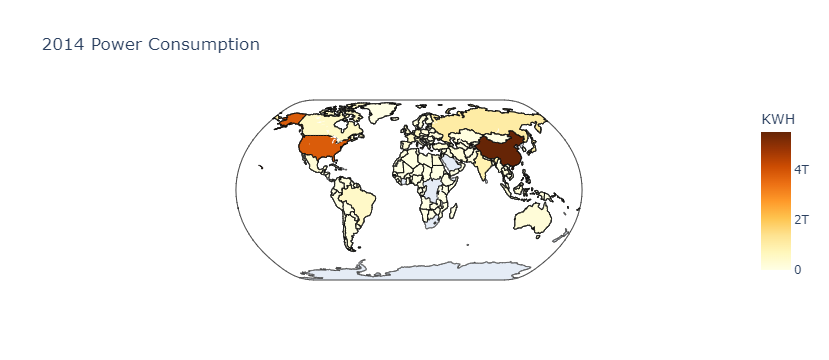

In [22]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

## USA Choropleth

** Import the 2012_Election_Data csv file using pandas. **

In [23]:
df2 = pd.read_csv('2012_Election_Data')

** Check the head of the DataFrame. **

In [62]:
df2.head()

,Year,ICPSR State Code,Alphanumeric State Code,State,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,2012,41,1,Alabama,NaN,58.6%,56.0%,NaN,"2,074,338","3,539,217",3707440.0,2.6%,"32,232","57,993","8,616","71,584",AL
1,2012,81,2,Alaska,58.9%,58.7%,55.3%,"301,694","300,495","511,792",543763.0,3.8%,"5,633","7,173","1,882","11,317",AK
2,2012,61,3,Arizona,53.0%,52.6%,46.5%,"2,323,579","2,306,559","4,387,900",4959270.0,9.9%,"35,188","72,452","7,460","81,048",AZ
3,2012,42,4,Arkansas,51.1%,50.7%,47.7%,"1,078,548","1,069,468","2,109,847",2242740.0,3.5%,"14,471","30,122","23,372","53,808",AR
4,2012,71,5,California,55.7%,55.1%,45.1%,"13,202,158","13,038,547","23,681,837",28913129.0,17.4%,"119,455",0,"89,287","208,742",CA


** Now create a plot that displays the Voting-Age Population (VAP) per state. If you later want to play around with other columns, make sure you consider their data type. VAP has already been transformed to a float for you. **

In [71]:
df2['voted_percentage'] = df2['Total Ballots Counted'].str.replace(',','').astype('float')/df2['Voting-Eligible Population (VEP)'].str.replace(',','').astype('float')

In [72]:
df2.head()

,Year,ICPSR State Code,Alphanumeric State Code,State,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv,voted_percentage
0,2012,41,1,Alabama,NaN,58.6%,56.0%,NaN,"2,074,338","3,539,217",3707440.0,2.6%,"32,232","57,993","8,616","71,584",AL,NaN
1,2012,81,2,Alaska,58.9%,58.7%,55.3%,"301,694","300,495","511,792",543763.0,3.8%,"5,633","7,173","1,882","11,317",AK,0.589486
2,2012,61,3,Arizona,53.0%,52.6%,46.5%,"2,323,579","2,306,559","4,387,900",4959270.0,9.9%,"35,188","72,452","7,460","81,048",AZ,0.529542
3,2012,42,4,Arkansas,51.1%,50.7%,47.7%,"1,078,548","1,069,468","2,109,847",2242740.0,3.5%,"14,471","30,122","23,372","53,808",AR,0.511197
4,2012,71,5,California,55.7%,55.1%,45.1%,"13,202,158","13,038,547","23,681,837",28913129.0,17.4%,"119,455",0,"89,287","208,742",CA,0.557480


In [77]:
### `locations`: locations parameter has to be passed as abbreviated name of the states 

In [78]:
data = dict(type='choropleth',
            colorscale = 'Viridis',
            locations = df2['State Abv'],
            locationmode = 'USA-states',
            # text = df2['Voting-Age Population (VAP)'],
            z = df2['Voting-Age Population (VAP)'],
            marker = dict(line = dict(color='rgb(12, 12, 12)',width=1)),
            colorbar = {'title': 'population'}
           )
            

In [79]:
layout = dict(title = '2012 Election voting age distribution',
              geo = dict(scope='usa'))

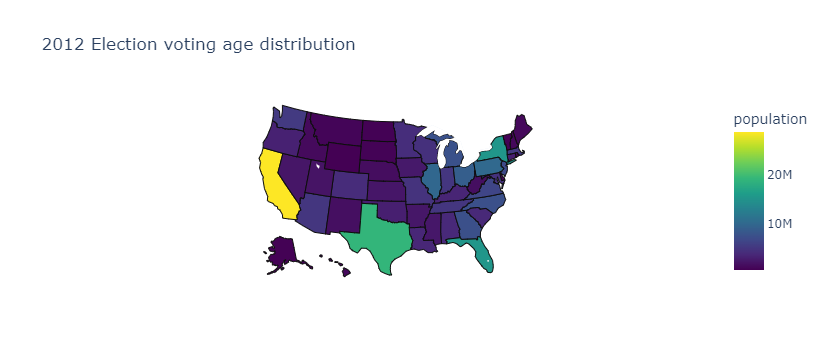

In [80]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [81]:
data = dict(type='choropleth',
            colorscale = 'Viridis',
            locations = df2['State Abv'],
            locationmode = 'USA-states',
            # text = df2['Voting-Age Population (VAP)'],
            z = df2['voted_percentage'],
            marker = dict(line = dict(color='rgb(12, 12, 12)',width=1)),
            colorbar = {'title': 'votes counted / voting-eligible population'}
           )
            

In [82]:
layout = dict(title = '2012 Election percentage of people whos voted',
              geo = dict(scope='usa'))

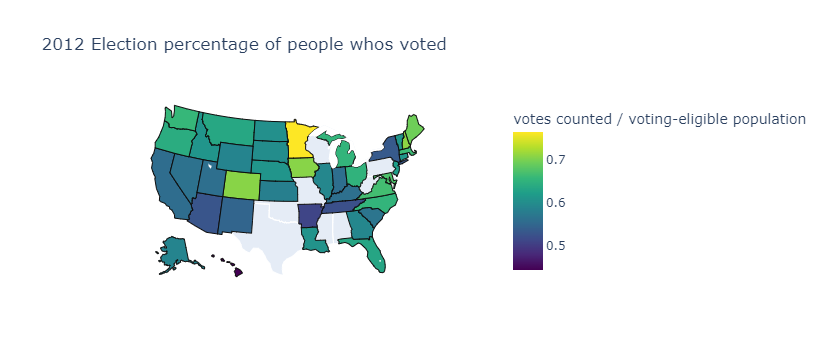

In [83]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# Great Job!